In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
REST = pd.read_csv('./data/REST_data_1.csv')
REST.head()

,ID,REST: Monthly Sales MOD,REST: Monthly rent MOD,REST: Monthly Expenses MOD,REST: Dividends MOD,REST: Staff size MOD,REST: No Wtr MOD,REST: No Ktch Wkr MOD,REST: No tables MOD,REST: Total Capital MOD,REST: Total Partners MOD,REST: No Act Part MOD,REST: No Pass Part MOD,REST: Applicant invest yr MOD,LRC: Did the applicant apply for Laborer's Return Certificate? MOD,MRC: Did the applicant apply for Merchant's Return Certificate? MOD,MRC: Total number of witnesses
0,D8E7S,4000.0,345.00,NaN,NaN,4.0,1.0,3.0,18.0,6000.0,6.0,3.0,3.0,1928.0,0,1,4.0
1,60H40,NaN,2000.00,NaN,NaN,30.0,18.0,12.0,200.0,90000.0,88.0,8.0,80.0,1924.0,0,1,2.0
2,ZYUTZ,NaN,2141.66,NaN,20.0,30.0,18.0,12.0,NaN,110000.0,149.0,12.0,137.0,1926.0,0,1,4.0
3,SDHXZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,MRRKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [8]:
REST.shape

(504, 17)

In [9]:
REST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ID                                                                   504 non-null    object 
 1   REST: Monthly Sales MOD                                              123 non-null    float64
 2   REST: Monthly rent MOD                                               142 non-null    float64
 3   REST: Monthly Expenses MOD                                           15 non-null     float64
 4   REST: Dividends MOD                                                  95 non-null     float64
 5   REST: Staff size MOD                                                 127 non-null    float64
 6   REST: No Wtr MOD                                                     102 non-null    float64
 7   REST: No

In [10]:
def drop_outliers(df):

  q1=df.quantile(0.1)
  q3=df.quantile(0.9)
  iqr=q3-q1

  not_outliers = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]

  df.reset_index(drop=True,inplace=True)

  return not_outliers

REST = drop_outliers(REST)
REST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ID                                                                   504 non-null    object 
 1   REST: Monthly Sales MOD                                              119 non-null    float64
 2   REST: Monthly rent MOD                                               130 non-null    float64
 3   REST: Monthly Expenses MOD                                           15 non-null     float64
 4   REST: Dividends MOD                                                  95 non-null     float64
 5   REST: Staff size MOD                                                 125 non-null    float64
 6   REST: No Wtr MOD                                                     100 non-null    float64
 7   REST: No

<ipython-input-10-6a54003e9251>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  not_outliers = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
<ipython-input-10-6a54003e9251>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  not_outliers = df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]


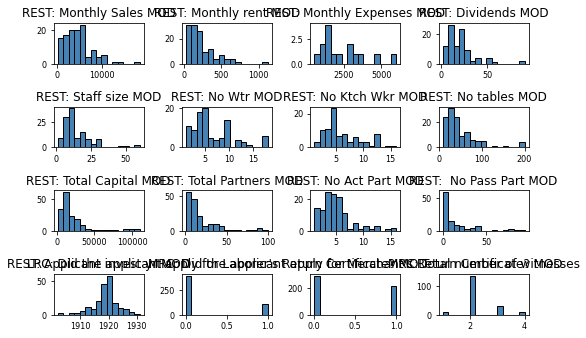

In [11]:
histo = REST.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    

plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

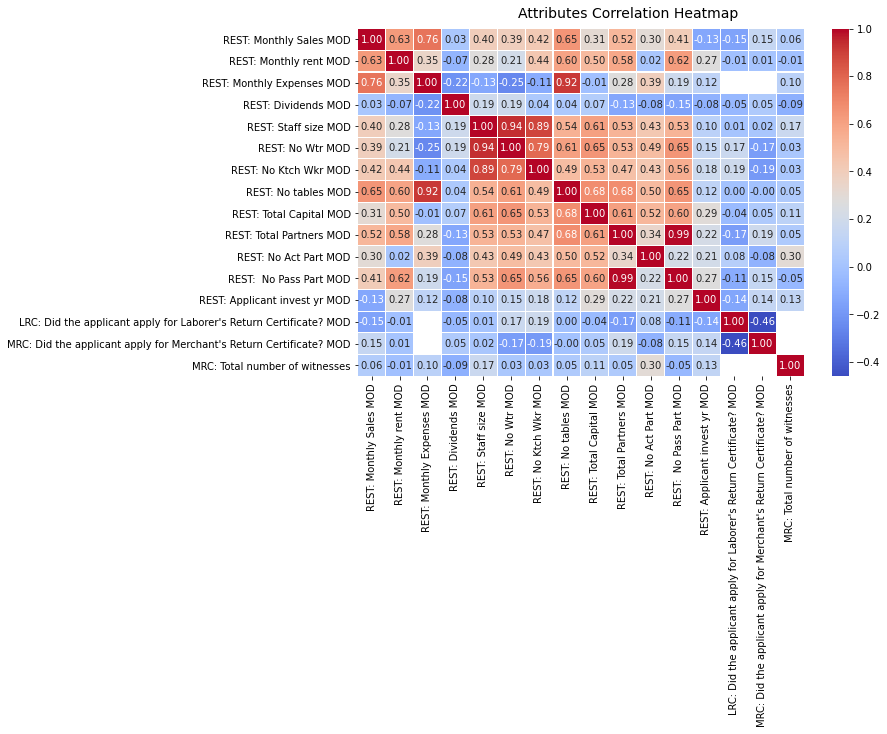

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
corr = REST.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [13]:
REST.to_csv("./data/REST_data_1_Cleaned.csv",index = False)